В файле «data.xlsx» представлены данные по поступлению денежных средств от
клиентов компании N за покупку ее услуг.


In [195]:
import pandas as pd
import matplotlib.pyplot as plt

In [196]:
d = '/content/data.xlsx'

df_raw = pd.read_excel(d)
df_raw

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,2021-11-15 00:00:00
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,NaN,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,NaN,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,NaN,оригинал,2021-11-08 00:00:00


In [197]:
del df_raw['Unnamed: 5']

In [198]:
processed_data = []
current_month = None

In [199]:
# пройтись по таблице и найти строки, где только обозначения месяца с годом
for index, row in df_raw.iterrows():
    if pd.isna(row[0]) and isinstance(row[2], str) and "2021" in row[2]:
        current_month = row[2]
    elif pd.notna(row[0]) or pd.notna(row[1]):
        processed_data.append([current_month] + row.tolist())
col = ['month','client_id',	'sum',	'status','sale',	'new/current',	'document',	'receiving_date']
df_new = pd.DataFrame(processed_data, columns=col)
df_new  = df_new.iloc[1:]
df_new['receiving_date'] = pd.to_datetime(df_new['receiving_date'])

<ipython-input-199-d32904a0f7de>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pd.isna(row[0]) and isinstance(row[2], str) and "2021" in row[2]:
<ipython-input-199-d32904a0f7de>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_month = row[2]
<ipython-input-199-d32904a0f7de>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif pd.notna(row[0]) or pd.notna(row[1]):


In [200]:
df_new.head()

,month,client_id,sum,status,sale,new/current,document,receiving_date
1,Май 2021,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26
2,Май 2021,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08
3,Май 2021,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08
4,Май 2021,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07
5,Май 2021,20.0,5796.7,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15


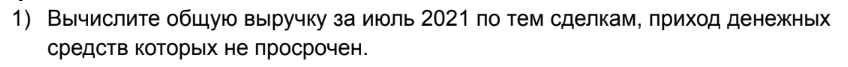


In [201]:
# Июль
july_data = df_new[(df_new['month'] == 'Июль 2021') & (df_new['status'] != 'ПРОСРОЧЕНО') ]
july_revenue = july_data['sum'].sum()
print(f"Общая выручка за июль 2021: {july_revenue:.2f}")

Общая выручка за июль 2021: 859896.47


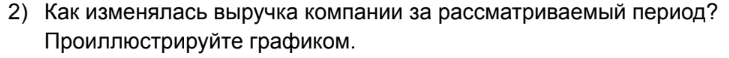

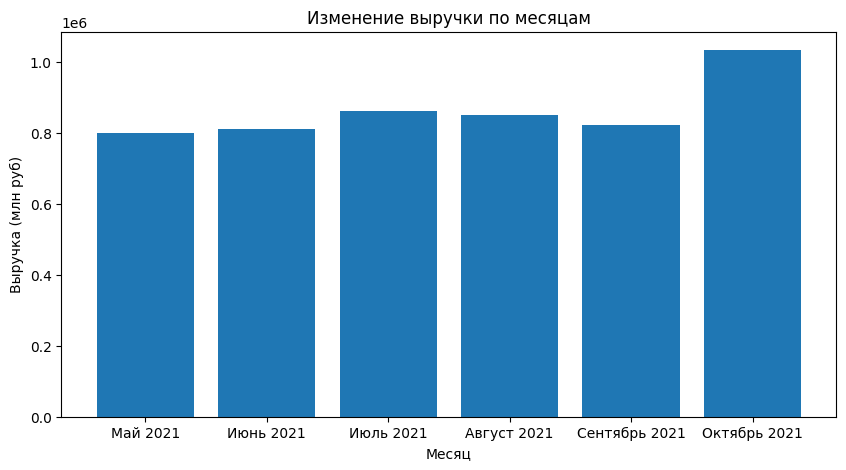

In [202]:
month_revenue = df_new.groupby('month', as_index=False, sort=False)['sum'].sum()
x = month_revenue['month']
y = month_revenue['sum']
plt.figure(figsize=(10, 5))
plt.bar(x,y)
plt.title('Изменение выручки по месяцам')
plt.ylabel('Выручка (млн руб)')
plt.xlabel('Месяц')
plt.show()

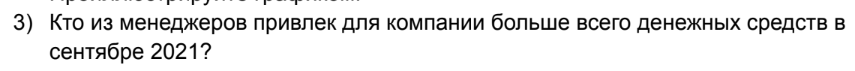

In [203]:
df_sept = df_new[(df_new['month'] == 'Сентябрь 2021') & (df_new['status'] != 'ПРОСРОЧЕНО') ]
september_revenue_managers = df_sept.groupby('sale', as_index=False, sort=False)['sum'].sum()
manager_max = september_revenue_managers['sum'].idxmax()
print(f"Менеджер с наибольшей выручкой в сентябре 2021: {september_revenue_managers['sale'][manager_max]} ")


Менеджер с наибольшей выручкой в сентябре 2021: Смирнов 


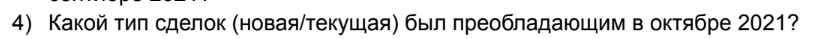

In [204]:
df_oct = df_new[(df_new['month'] == 'Октябрь 2021')]
max_type = df_oct['new/current'].value_counts().idxmax()
print(f"{max_type} - преобладающий тип сделок в октябре 2021")

текущая - преобладающий тип сделок в октябре 2021


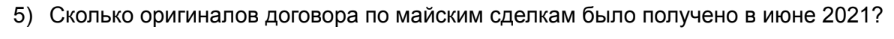

In [205]:
df_may = df_new[(df_new['month'] == 'Май 2021')]
df_may = df_may.copy()

june_originals = df_may[(df_may['document'] == 'оригинал') & (df_may['receiving_date'].dt.month == 6)].shape[0]
print(f"Количество оригиналов договоров по майским сделкам, которые получили в июне 2021: {june_originals}")

Количество оригиналов договоров по майским сделкам, которые получили в июне 2021: 76


Задание:
За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.

1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).

2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).

Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по мере
прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.


In [206]:
# сделки до 01.07.2021
df_bonus = df_new[(df_new['month'] == 'Май 2021') | (df_new['month'] == 'Июнь 2021')].copy()
df_bonus['bonus'] = 0


new_deals = df_bonus[(df_bonus['new/current'] == 'новая') & (df_bonus['status'] == 'ОПЛАЧЕНО')]
current_deals_big = df_bonus[(df_bonus['new/current'] != 'новая') & (df_bonus['status'] != 'ПРОСРОЧЕНО') & (df_bonus['sum'] > 10000)]
current_deals_small = df_bonus[(df_bonus['new/current'] != 'новая') & (df_bonus['status'] != 'ПРОСРОЧЕНО') & df_bonus['sum'] < 10000]

In [207]:
new_deals.loc[:,'bonus'] = new_deals['sum']*0.07
current_deals_big.loc[:, 'bonus'] = current_deals_big['sum']*0.5
current_deals_small.loc[:, 'bonus'] = current_deals_small['sum']*0.3

In [208]:
rest_bonus_new_deals = new_deals[(new_deals['receiving_date'].dt.month != 6) & (new_deals['receiving_date'].dt.month != 5) ]
rest_bonus_current_deals_big = current_deals_big[(current_deals_big['receiving_date'].dt.month != 6) & (current_deals_big['receiving_date'].dt.month != 5) ]
rest_bonus_current_deals_small = current_deals_small[(current_deals_big['receiving_date'].dt.month != 6) & (current_deals_small['receiving_date'].dt.month != 5) ]

In [209]:
result = pd.concat([rest_bonus_new_deals, rest_bonus_current_deals_big, rest_bonus_current_deals_small], axis=0)

remaining_bonus = result.groupby('sale')['bonus'].sum().reset_index()
print('Остаток каждого из менеджеров на 01.07.2021:')
remaining_bonus

Остаток каждого из менеджеров на 01.07.2021:


,sale,bonus
0,Андреев,34260.080
1,Васильев,187.509
2,Иванов,59882.720
3,Кузнецова,10111.808
4,Петрова,39515.128
5,Селиванов,4336.913
6,Смирнов,77774.559
7,Филимонова,727.468
